In [3]:
def add_and_remove_edges(G, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = []    

    for node in G.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G.add_edge(node, new)    
                #print ("\tnew edge:\t {} -- {}").format(node, new)    
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G.remove_edge(node, remove)    
                #print ("\tedge removed:\t {} -- {}").format(node, remove)    
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges    

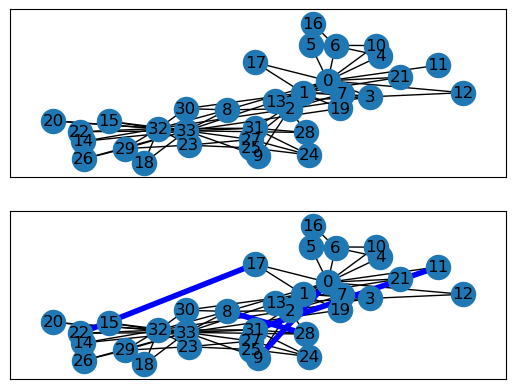

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

p_new_connection = 0.1
p_remove_connection = 0.1

G = nx.karate_club_graph() # sample graph (undirected, unweighted)
# show original
plt.figure(1); plt.clf()
fig, ax = plt.subplots(2,1, num=1, sharex=True, sharey=True)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, ax=ax[0])

# now apply one round of changes
rem_edges, new_edges = add_and_remove_edges(G, p_new_connection, p_remove_connection)

# and draw new version and highlight changes
nx.draw_networkx(G, pos=pos, ax=ax[1])
nx.draw_networkx_edges(G, pos=pos, ax=ax[1], edgelist=new_edges,
                       edge_color='b', width=4)
# note: to highlight edges that were removed, add them back in;
# This is obviously just for display!
G.add_edges_from(rem_edges)
nx.draw_networkx_edges(G, pos=pos, ax=ax[1], edgelist=rem_edges,
                       edge_color='r', style='dashed', width=4)
G.remove_edges_from(rem_edges)

plt.show() 